In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Read the dataset

In [112]:
dataset = pd.read_csv("train_Df64byy.csv")

In [113]:
dataset

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [114]:
dataset.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [115]:
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,50882,NaN,NaN,NaN,25441.5,14688.5,1,12721.2,25441.5,38161.8,50882
City_Code,50882,36,C1,8973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,50882,NaN,NaN,NaN,1732.79,1424.08,1,523,1391,2667,6194
Accomodation_Type,50882,2,Owned,27951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reco_Insurance_Type,50882,2,Individual,40536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Upper_Age,50882,NaN,NaN,NaN,44.8563,17.3103,18,28,44,59,75
Lower_Age,50882,NaN,NaN,NaN,42.7389,17.3194,16,27,40,57,75
Is_Spouse,50882,2,No,42460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Health Indicator,39191,9,X1,13010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holding_Policy_Duration,30631,15,1.0,4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since Holding_Policy_Type is categorical variable changing the dtypes to object

In [116]:
dataset["Holding_Policy_Type"] = dataset["Holding_Policy_Type"].astype(str)

In [117]:
dataset.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type         object
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

As we can see there are many missing values first replacing Holding_Policy_Type nan value by *0*

In [119]:
dataset["Holding_Policy_Type"].fillna(0, inplace = True)

In [120]:
dataset.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

Droping ID as it is just a unique values


In [ ]:
dataset = dataset.drop("ID",axis = 1)


Spliting the dataset to independent and dependent dataset

In [122]:
X = dataset.drop("Response",axis=1)
Y = dataset["Response"]

hot encoding the categorical variable


In [123]:
df_prep = pd.get_dummies(X,drop_first=True)
df_prep

,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Duration_10.0,Holding_Policy_Duration_11.0,Holding_Policy_Duration_12.0,Holding_Policy_Duration_13.0,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_nan
0,3213,36,36,22,11628.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1117,75,22,22,30510.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3732,32,32,19,7450.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4378,52,48,19,17780.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2190,44,44,16,10404.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,845,22,22,18,7704.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
50878,4188,27,27,4,5408.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
50879,442,63,63,12,11374.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
50880,4,71,49,16,28179.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


filling the missing value of other categorical variable using KNN 

In [124]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)
imputer.fit_transform(df_prep)

array([[3.213e+03, 3.600e+01, 3.600e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.117e+03, 7.500e+01, 2.200e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.732e+03, 3.200e+01, 3.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [4.420e+02, 6.300e+01, 6.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 7.100e+01, 4.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.866e+03, 2.400e+01, 2.400e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
df_prep.loc[:,df_prep.isnull().sum()>0]

In [126]:
df_prep.isnull().sum()

Region_Code                    0
Upper_Age                      0
Lower_Age                      0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
                              ..
Holding_Policy_Duration_9.0    0
Holding_Policy_Type_2.0        0
Holding_Policy_Type_3.0        0
Holding_Policy_Type_4.0        0
Holding_Policy_Type_nan        0
Length: 69, dtype: int64

Visualizing using seaborn

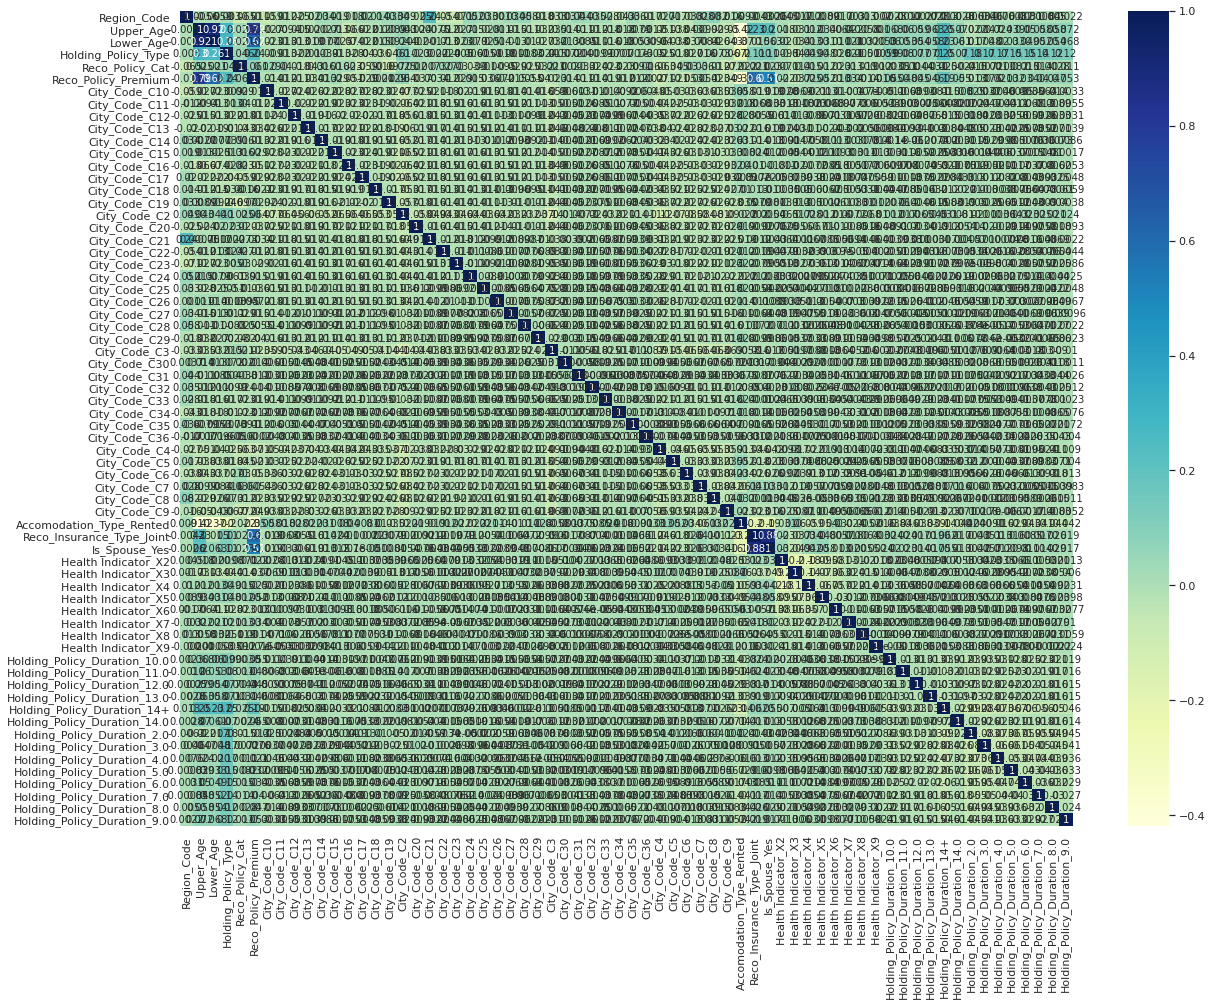

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df_prep.corr(),annot=True, annot_kws={"size": 10},cmap="YlGnBu")


normalizing the continuous variables

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_prep[:] = scaler.fit_transform(df_prep)

In [128]:
df_prep

,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Duration_10.0,Holding_Policy_Duration_11.0,Holding_Policy_Duration_12.0,Holding_Policy_Duration_13.0,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_nan
0,1.039425,-0.511625,-0.389098,1.085830,-0.387852,-0.180822,-0.151863,-0.131739,-0.141949,-0.121982,-0.154483,-0.151048,-0.152673,-0.126147,-0.134112,-0.423791,-0.136148,-0.116297,-0.101218,-0.108033,-0.104822,-0.085119,-0.09952,-0.076365,-0.075052,-0.087545,3.067156,-0.033782,-0.017172,-0.056164,-0.075184,-0.050611,-0.033193,-0.026609,-0.278850,-0.165968,-0.199628,-0.197489,-0.191833,-0.211824,1.104046,-0.505203,-0.445367,-0.504774,-0.391489,-0.356692,-0.18744,-0.160641,-0.062185,-0.039183,-0.035209,-0.127427,-0.104149,-0.10092,-0.100721,3.276810,-0.096141,-0.302280,-0.275355,-0.239992,-0.220638,-0.196628,-0.182784,-0.162943,-0.149612,-0.330297,1.682785,-0.298938,-0.813098
1,-0.432415,1.741395,-1.197449,1.085830,2.477394,-0.180822,-0.151863,-0.131739,-0.141949,-0.121982,-0.154483,-0.151048,-0.152673,-0.126147,-0.134112,-0.423791,-0.136148,-0.116297,-0.101218,-0.108033,-0.104822,-0.085119,-0.09952,-0.076365,-0.075052,-0.087545,-0.326035,-0.033782,-0.017172,-0.056164,-0.075184,-0.050611,-0.033193,-0.026609,-0.278850,6.025240,-0.199628,-0.197489,-0.191833,-0.211824,-0.905759,1.979403,-0.445367,1.981086,-0.391489,-0.356692,-0.18744,-0.160641,-0.062185,-0.039183,-0.035209,-0.127427,-0.104149,-0.10092,-0.100721,-0.305175,-0.096141,-0.302280,-0.275355,-0.239992,-0.220638,-0.196628,-0.182784,-0.162943,-0.149612,-0.330297,-0.594253,-0.298938,1.229865
2,1.403874,-0.742704,-0.620055,0.612688,-1.021842,-0.180822,-0.151863,-0.131739,-0.141949,-0.121982,-0.154483,-0.151048,-0.152673,-0.126147,-0.134112,-0.423791,-0.136148,-0.116297,-0.101218,-0.108033,-0.104822,-0.085119,-0.09952,-0.076365,-0.075052,-0.087545,-0.326035,-0.033782,-0.017172,-0.056164,-0.075184,-0.050611,-0.033193,-0.026609,-0.278850,6.025240,-0.199628,-0.197489,-0.191833,-0.211824,-0.905759,-0.505203,-0.445367,-0.504774,-0.391489,-0.356692,-0.18744,-0.160641,-0.062185,-0.039183,-0.035209,-0.127427,-0.104149,-0.10092,-0.100721,-0.305175,-0.096141,-0.302280,-0.275355,-0.239992,-0.220638,-0.196628,-0.182784,-0.162943,-0.149612,-0.330297,-0.594253,-0.298938,-0.813098
3,1.857504,0.412691,0.303775,0.612688,0.545682,-0.180822,-0.151863,-0.131739,-0.141949,-0.121982,-0.154483,-0.151048,-0.152673,-0.126147,-0.134112,-0.423791,-0.136148,-0.116297,-0.101218,-0.108033,9.539961,-0.085119,-0.09952,-0.076365,-0.075052,-0.087545,-0.326035,-0.033782,-0.017172,-0.056164,-0.075184,-0.050611,-0.033193,-0.026609,-0.278850,-0.165968,-0.199628,-0.197489,-0.191833,-0.211824,-0.905759,1.979403,-0.445367,-0.504774,-0.391489,-0.356692,-0.18744,-0.160641,-0.062185,-0.039183,-0.035209,-0.127427,-0.104149,-0.10092,-0.100721,3.276810,-0.096141,-0.302280,-0.275355,-0.239992,-0.220638,-0.196628,-0.182784,-0.162943,-0.149612,-0.330297,1.682785,-0.298938,-0.813098


spliting the data into train and test

In [129]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_prep,Y,test_size=0.25,random_state = 1234, stratify = Y)

In [265]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=15,min_samples_leaf=4,class_weight={0:0.65784915,1:2.2},random_state=1234)

Importing confusion matrics and classification report to check presition recall and f1 score as well as confusion table

In [ ]:
#also importing cm matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report

to find the balanced weight importing compute_class_weight from sklearn

In [88]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight(class_weight='balanced',classes=np.unique(Y),y=Y)

array([0.65784915, 2.08379065])

fitting the data to diff classifiers and predicting

In [266]:
dtc.fit(x_train,y_train)
Y_pred_dtc = dtc.predict(x_test)

cm_dtc = confusion_matrix(y_test,Y_pred_dtc)
score_dtc = dtc.score(x_test,y_test)
cr_dtc = classification_report(y_test,Y_pred_dtc)

print(cm_dtc)
print("the score:",score_dtc)
print(cr_dtc)

[[3986 5683]
 [ 704 2348]]
the score: 0.49791683043785867
              precision    recall  f1-score   support

           0       0.85      0.41      0.56      9669
           1       0.29      0.77      0.42      3052

    accuracy                           0.50     12721
   macro avg       0.57      0.59      0.49     12721
weighted avg       0.72      0.50      0.52     12721



importing Test dataset

In [182]:
testdata = pd.read_csv("test_YCcRUnU.csv")


In [203]:
Test = pd.read_csv("test_YCcRUnU.csv")

Droping ID column 

In [183]:
testdata = testdata.drop("ID",axis = 1)


In [184]:
testdata

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


Since Holding_Policy_Type is categorical variable changing the dtypes to object and replacing its nan value with 0

following same step to clean the data as of training data

In [185]:
testdata["Holding_Policy_Type"] = testdata["Holding_Policy_Type"].astype(str)

In [186]:
testdata["Holding_Policy_Type"].fillna(0, inplace = True)

In [188]:
testdata = pd.get_dummies(testdata,drop_first=True)

In [189]:
testdata

,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Duration_10.0,Holding_Policy_Duration_11.0,Holding_Policy_Duration_12.0,Holding_Policy_Duration_13.0,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_nan
0,156,30,30,5,11934.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,7,69,68,18,32204.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,564,28,28,17,9240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1177,23,23,18,9086.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,951,75,75,5,22534.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,1044,45,45,18,15884.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21801,266,59,59,18,21390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
21802,2470,74,74,1,17836.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21803,1676,25,25,19,11568.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [190]:
imputer1 = KNNImputer(n_neighbors=11)
imputer1.fit_transform(testdata)

array([[1.560e+02, 3.000e+01, 3.000e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 6.900e+01, 6.800e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [5.640e+02, 2.800e+01, 2.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.470e+03, 7.400e+01, 7.400e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.676e+03, 2.500e+01, 2.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.617e+03, 7.300e+01, 7.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [191]:
testdata.loc[:,testdata.isnull().sum()>0]

""
0
1
2
3
4
...
21800
21801
21802
21803


In [192]:
testdata[:] = scaler.fit_transform(testdata)

In [267]:
testdata_predict = dtc.predict(testdata)

The predicted values for response

In [268]:
testdata_predict

array([1, 1, 1, ..., 0, 0, 0])

In [269]:
testdata_predict  = pd.DataFrame(testdata_predict)

In [270]:
testdata_predict.columns = ["Response"]


Creating Test dataframe to concat with predicted values

In [ ]:
Test = Test["ID"]
Test

In [272]:
final = pd.concat([Test,testdata_predict], axis=1)

In [273]:
final.to_csv("Health_Insurance_4.csv")